Open sources provide data on game sales, user and expert evaluations, genres and platforms.
The purpose of the research is to help the management of the Streamchik online store (a store selling computer games worldwide) to master working with the data and identify factors determining the success of games. This will allow targeting potentially popular products and planning advertising campaigns.




The research will be conducted according to the following plan:


1. study of general Open sources provide data on game sales, user and expert evaluations, genres and platforms.
The purpose of the research is to help the management of the Streamchik online store (a store selling computer games worldwide) to master working with the data and identify factors determining the success of games. This will allow targeting potentially popular products and planning advertising campaigns.








The research will be conducted according to the following plan:




1. Study of general information
2. data preprocessing
3 Conducting exploratory data analysis
4. Compiling a user profile for each region
5. Hypothesis testing
6. Formulation of conclusions
2. Data preprocessing
3. Conducting exploratory data analysis
4. Compiling a user profile for each region
5. Hypothesis testing
6. Formulation of conclusions

# 1. General information

Import the libraries needed to analyze the data:

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st

Let's familiarize ourselves with the dataset:

In [2]:
import pandas as pd

try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The table contains 16,715 rows and 11 columns. Six of them contain data omissions. Column names are not styled correctly, and the data types of some columns are incorrect. Nevertheless, the amount of information is sufficient for the study.

# 2. Data preprocessing

**Rename the columns**

In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Remove duplicates**

In [6]:
df = df.drop_duplicates()

duplicate_columns = ['name', 'platform', 'year_of_release']

duplicates_count_before = df[df.duplicated(subset=duplicate_columns)].count()
print("The number of duplicates before deletion by the specified columns:")
print(duplicates_count_before)

df = df.drop_duplicates(subset=duplicate_columns)
duplicates_count_after = df[df.duplicated(subset=duplicate_columns)].count()
print("The number of duplicates after deletion by the specified columns:")
print(duplicates_count_after)


The number of duplicates before deletion by the specified columns:
name               1
platform           2
year_of_release    2
genre              1
na_sales           2
eu_sales           2
jp_sales           2
other_sales        2
critic_score       1
user_score         1
rating             1
dtype: int64
The number of duplicates after deletion by the specified columns:
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


The entire dataset was checked for implicit duplicates in the name, platform and year_of_release columns. The duplicate rows were then removed with further validation.

**Pass processing**

In [7]:
# Let's check how many percent of the values are missing from the `name` column.
missing_name = df['name'].isnull().mean() * 100 
print(f"The `name` column is missing values in the {missing_name:.3f}% of data.")

The `name` column is missing values in the 0.006% of data.


In [8]:
df = df.dropna(subset=['name'])

In [9]:
# Check how many percent of the values are missing from the `year_of_release` column:
missing_year = df['year_of_release'].isnull().mean() * 100
print(f"The `year_of_release` column is missing values in the {missing_year:.3f}% of data.")

The `year_of_release` column is missing values in the 1.610% of data.


In [10]:
df = df.dropna(subset=['year_of_release'])
#df.isna().sum()

In [11]:
# Let's check how many percent of the values are missing from the `critic_score` column:
missing_critic = df['critic_score'].isnull().mean() * 100
print(f"The `critic_score` column is missing values in the {missing_critic:.3f}% of data.")

The `critic_score` column is missing values in the 51.457% of data.


More than half of the data in this column are missing. Let's replace the missing values with the special value -1, which will mean that there is no score. We choose this way of filling in the gaps, since it would be incorrect to replace the gaps with the mean or median at this volume.

In [12]:
df['critic_score'] = df['critic_score'].fillna(-1)
print("Skips in `critic_score` have been replaced with -1.")

Skips in `critic_score` have been replaced with -1.


In [13]:
# Check how many percent of values are missing from the `user_score` column
missing_user = df['user_score'].isnull().mean() * 100
print(f"The `user_score` column is missing values in the {missing_user:.3f} % of data.")

The `user_score` column is missing values in the 40.169 % of data.


A significant proportion of the data is missing, which makes statistical replacement (by median or mean) unreliable. Let's replace the missing values with the special value -1.

In [14]:
df['user_score'] = df['user_score'].fillna(-1)
print("Skips in `user_score` have been replaced with -1.")

Skips in `user_score` have been replaced with -1.


In [15]:
# Check how many percent of the value is 'tbd'
tbd_user = (df['user_score'] == 'tbd').mean() * 100
print(f"The `user_score` column has 'tbd' in {tbd_user:.3f}% of data.")

The `user_score` column has 'tbd' in 14.450% of data.


user_score is 'tbd' (to be determined) in 14.45% of the data, let's replace these values with -1 to bring all column values to the same data type.

In [16]:
df['user_score'] = df['user_score'].replace('tbd', -1)
print("'tbd' in `user_score` replaced by -1.")

'tbd' in `user_score` replaced by -1.


In [17]:
df['user_score'].value_counts()

user_score
-1     8981
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.5       2
0.3       2
1.1       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [18]:
# Let's check how many percent of the values are missing from the `rating` column
missing_rating = df['rating'].isnull().mean() * 100
print(f"The `rating` column has missing values in {missing_rating:.3f}% of data.")

The `rating` column has missing values in 40.601% of data.


There are quite a few omissions, and statistical substitution may skew the data. We use the string value 'unknown' to denote an unknown age category.

In [19]:
df['rating'] = df['rating'].fillna('unknown')
print("The omissions in `rating` have been replaced with 'unknown'.")

The omissions in `rating` have been replaced with 'unknown'.


In [20]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

All skips have been removed, or replaced.

**Convert column types**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [22]:
df['year_of_release'] = (df['year_of_release']).astype('int')
df['critic_score'] = (df['critic_score']).astype('int')
df['user_score'] = (df['user_score']).astype('float')

**Let's calculate total sales in all regions**

In [23]:
df['total_sales'] = df[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df[['name', 'platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head()

,name,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Wii Sports,Wii,41.36,28.96,3.77,8.45,82.54
1,Super Mario Bros.,NES,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,11.27,8.89,10.22,1.00,31.38


**Results of data preprocessing:**




- Removed rows with implicit duplicates.
- Deleted rows with skips in those columns where it was possible.
- Columns with a large number of omissions were replaced with values corresponding to the data type.
- Total sales for all regions were calculated and entered into the table.

# 3. Exploratory data analysis

**Let's see how many games were released in different years:**

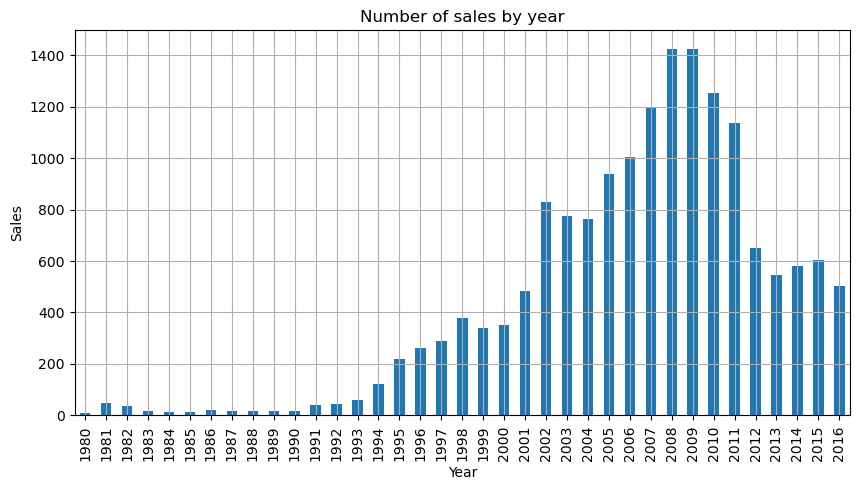

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


In [24]:
counts = df[df['year_of_release'] > -1]['year_of_release'].value_counts().sort_index()

counts.plot(kind='bar', figsize=(10, 5), grid=True)
plt. title('Number of sales by year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

print(df[df['year_of_release'] > -1]['year_of_release'].describe())

Graph Analysis:
- The graph shows a significant increase in the number of sales starting in the late 90's, with a peak between 2007 and 2010.
- After the peak in 2010, a decline in the number of sales is visible, but there is a slight increase over the following years until 2016.
- The earliest years, starting in 1980, show a low level of sales, which gradually increases by the mid-1990s.


Contemporary data (from 2000 onwards) will be more relevant to our analysis because it reflects the current state of the market. This data can better show how current technology and marketing strategies affect product success. Data from 2010 onwards is particularly important

**Explore data by platform**

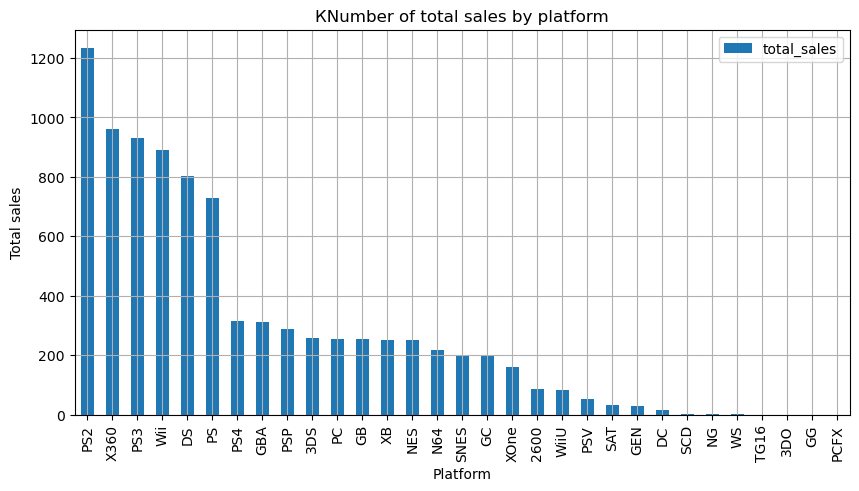

In [25]:
sales = (
    df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

sales.plot(kind='bar', figsize=(10, 5), grid=True)
plt.title('КNumber of total sales by platform')
plt.xlabel('Platform')
plt.ylabel('Total sales')
plt.show()

According to the graph of total sales, 6 platforms are leading by a large margin. Let's see how the sales of each platform behaved by year:

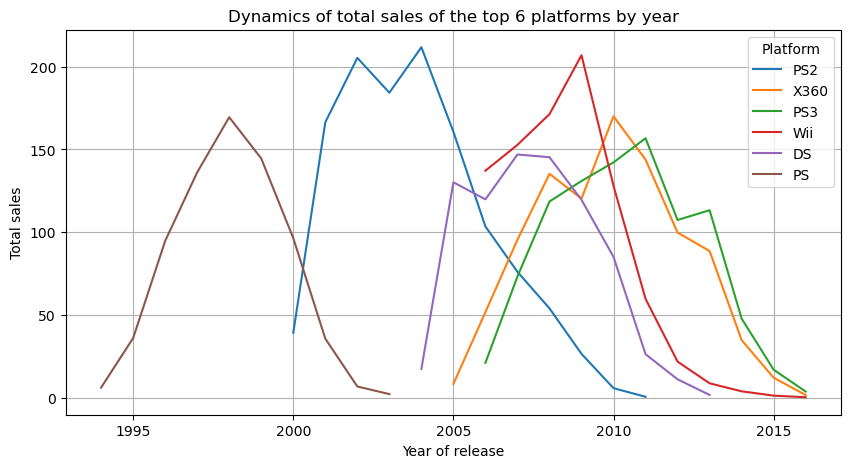

In [55]:
top_sales = (
    df.groupby('platform')['total_sales']
    .sum()
    .nlargest(6)
    .index
)

plt.figure(figsize=(10, 5))

for platform in top_sales:
    sales_by_year = (
        df[df['platform'] == platform]
        .groupby('year_of_release')['total_sales']
        .sum()
        .sort_index()
    )
    sales_by_year.plot(label=platform)

plt. title('Dynamics of total sales of the top 6 platforms by year')
plt.xlabel('Year of release')
plt.ylabel('Total sales')
plt.legend( title='Platform')
plt.grid(True)
plt.show()

The sales graph of the DS console behaves strangely - the number of sales before 2004 is extremely low and almost unchanged. Let's check why this is so:

In [27]:
print(df.query('platform == "DS" and year_of_release < 2004'))


                                      name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15957       0.0       0.0      0.02          0.0            -1        -1.0   

        rating  total_sales  
15957  unknown         0.02  


The graph shows the strange behavior of the DS platform because there is an error in the data: the dataset for the DS platform records the game's release in 1985, which is incorrect because the DS console was not released until 2004.
Let's remove this entry from the data:

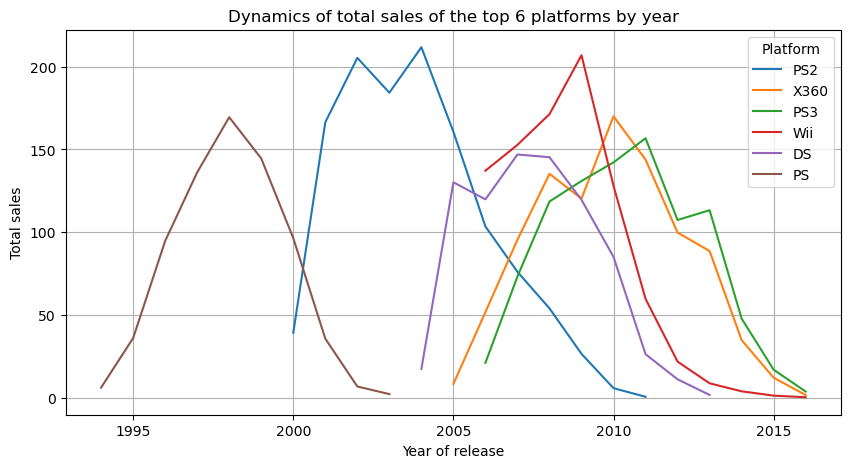

In [56]:
df = df[~((df['platform'] == 'DS') & (df['year_of_release'] < 2004))] #Удлим все записи по консоли DF раньше 2004 года
 
top_sales = (
    df.groupby('platform')['total_sales']
    .sum()
    .nlargest(6)
    .index
)

plt.figure(figsize=(10, 5))

for platform in top_sales:
    sales_by_year = (
        df[df['platform'] == platform]
        .groupby('year_of_release')['total_sales']
        .sum()
        .sort_index()
    )
    sales_by_year.plot(label=platform)

plt. title('Dynamics of total sales of the top 6 platforms by year')
plt.xlabel('Year of release')
plt.ylabel('Total sales')
plt.legend( title='Platform')
plt.grid(True)
plt.show()

Let's determine the characteristic period of appearance and disappearance of game platforms, as well as identify the period during which platforms are at the peak of their popularity (judging by the previous graph - this is the first half of the period of existence of platforms):

In [57]:
# Determine the minimum and maximum release year of games for platforms
platform_lifespan = df.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()

# Calculate the duration of the platform (including both boundary years)
platform_lifespan['lifecycle_duration'] = platform_lifespan['max'] - platform_lifespan['min'] + 1

# Let's find the median duration of existence of platforms
median_lifecycle_duration = platform_lifespan['lifecycle_duration'].median()
print(f'Median value of platform lifecycle duration: { median_lifecycle_duration} years')

# Let's calculate the first half of the median lifetime (peak popularity period)
peak_period = np.ceil(median_lifecycle_duration / 2)
print(f'Оdefine the actual period for the last { peak_period} years')


Median value of platform lifecycle duration: 7.0 years
Оdefine the actual period for the last 4.0 years


**Conclusion:**

Based on data analysis, the median length of time platforms have been on the market is 7 years, and the first 4 years of that timeframe are the most productive in terms of game sales and support.

**Explore platform sales for the current period:**

In [30]:
recent_platforms = (
    df.query('year_of_release >= 2016 - @peak_period')
    .groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)
recent_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS']

In [31]:
recent_data = df.query('year_of_release >= 2016 - @peak_period').reset_index(drop=True)
recent_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


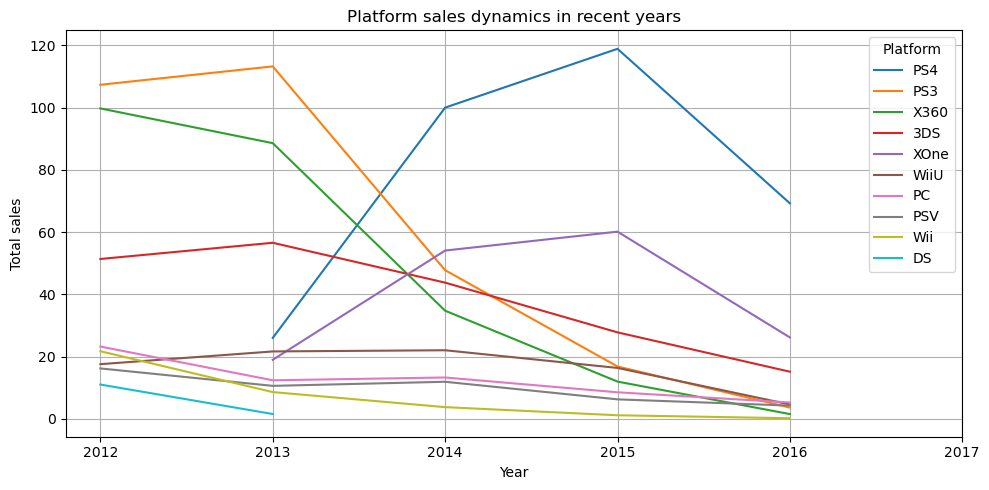

In [58]:
for platform in recent_platforms:
    platform_sales = (
        recent_data.query('platform == @platform')
        .groupby('year_of_release')['total_sales']
        .sum()
        .sort_index()
    )
    platform_sales.plot(kind='line', figsize=(10, 5), label=platform)

plt. title('Platform sales dynamics in recent years')
plt.xticks(np.arange(2012, 2018, step=1))
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.legend( title='Platform')
plt.grid(True)
plt.tight_layout()
plt.show()

- The PS4 remains the most promising platform in 2016, with strong sales despite a slight decline. It is followed by XOne, although its peak has already passed.
- The previous generation platforms (PS3, X360, Wii, DS) have almost completely lost relevance.
- The 3DS and WiiU are also on the decline, and their prospects in 2016 are slim.

**Let's build a box-and-whisker chart of global game sales by platform:**

In [33]:
recent_data['total_sales'].describe()

count    2885.000000
mean        0.501393
std         1.249340
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

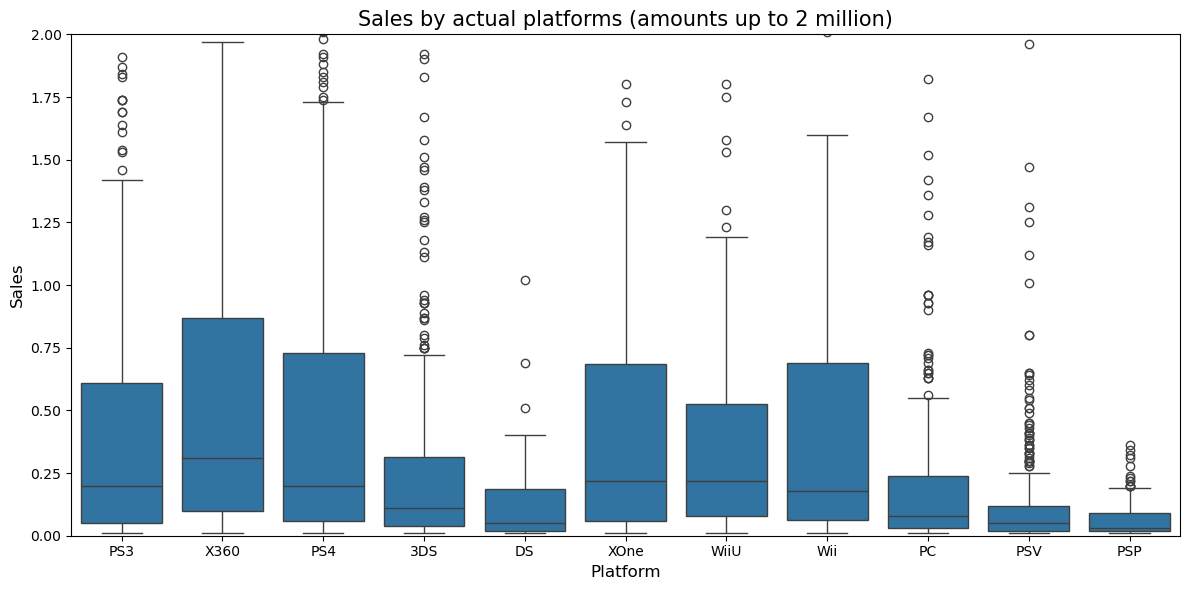

In [59]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=recent_data, x='platform', y='total_sales')
ax.set(ylim=(0, 2))
plt. title('Sales by actual platforms (amounts up to 2 million)',fontsize=15)
plt.xlabel('Platform',fontsize=12)
plt.ylabel('Sales',fontsize=12)

plt.tight_layout()
plt.show()

**Conclusion:**

- Most platforms have median sales below 0.5 million copies, indicating that a significant proportion of games are sold in small numbers.
- The **X360**, **PS4**, and **XOne** platforms show higher sales levels, with medians and spreads that are higher than other platforms, indicating significant success on these platforms.
- **Wii**, **WiiU** and **PS3** also show high sales spreads, indicating hit games, but median sales for these platforms are still lower than the leaders.
- **PC**, **PSV**, **PSP** and **DS** have low median sales, which indicates that most games on these platforms sell poorly, and only a few reach high values.
- A large number of outliers on platforms such as **X360**, **PS4**, **Wii**, and **PC** can be seen in the graph, indicating that there are a few games with extremely high sales compared to the mainstream.
- This is supported by the maximum values on the descriptive stats, where 21.05 million copies is a clear outlier.

**Let's see how user and critic reviews affect sales within one popular platform:**

In [60]:
# Identify the top 6 current sales platforms
top_6_platforms = (
    recent_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index().head(6)['platform'].tolist()
)

top_6_platforms


['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU']

Correlation between user ratings and sales for platform PS4 =  -0.031957110204556376


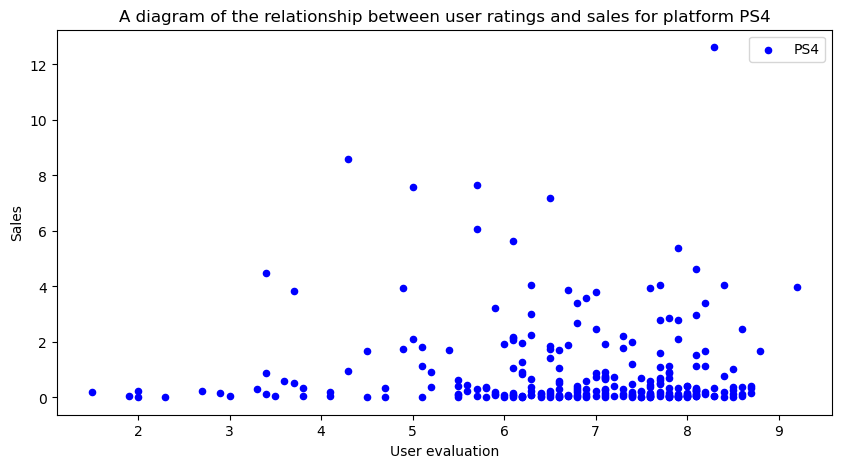

Correlation between user ratings and sales for platform PS3 =  -0.006205767686051523


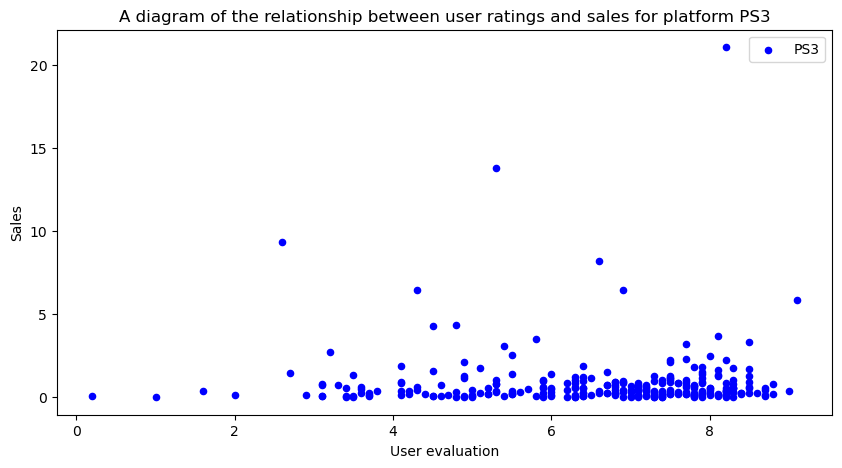

Correlation between user ratings and sales for platform X360 =  0.006163978646213326


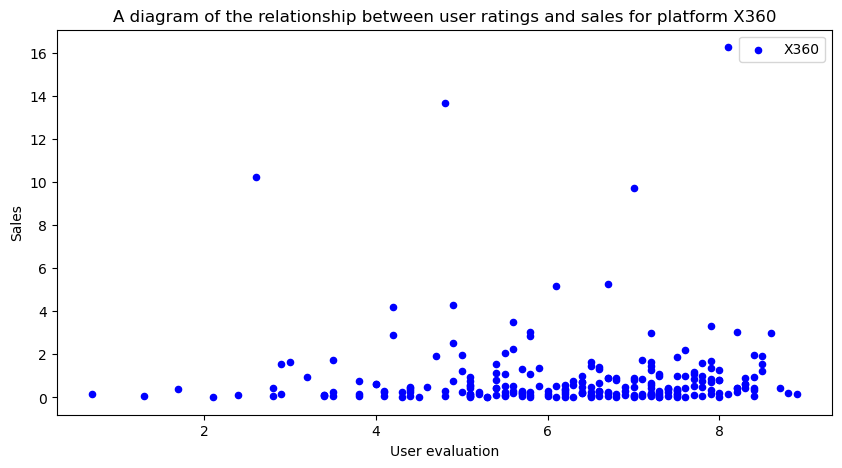

Correlation between user ratings and sales for platform 3DS =  0.19758263411038599


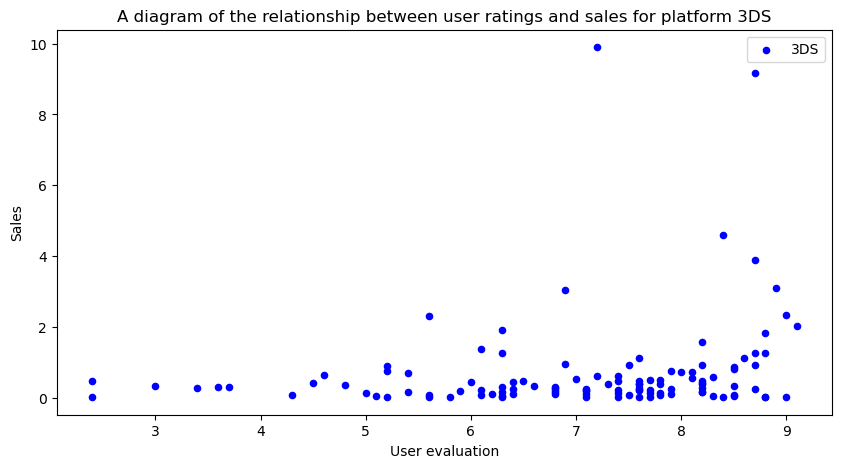

Correlation between user ratings and sales for platform XOne =  -0.06892505328279414


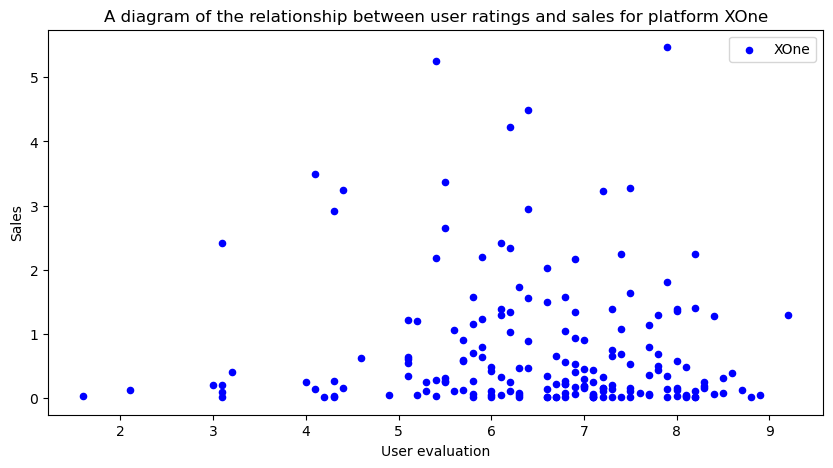

Correlation between user ratings and sales for platform WiiU =  0.4002190202148617


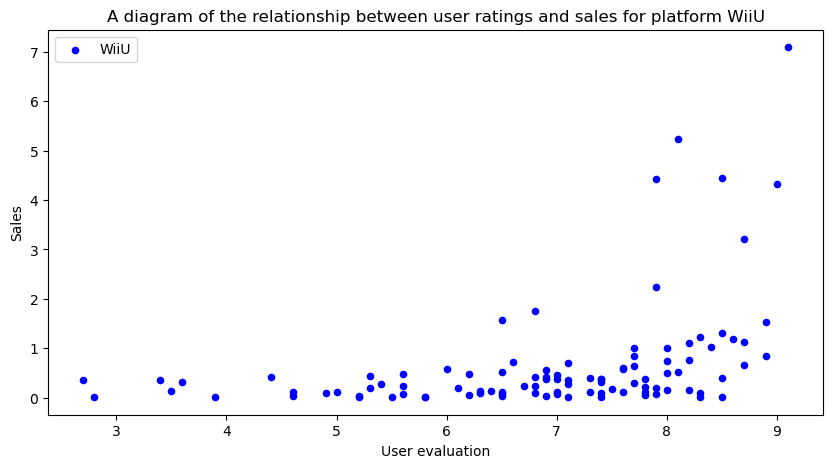

In [62]:
# Plot the relationship between user ratings and sales for the top 6 platforms
for platform in top_6_platforms:
    (
    recent_data
        .query('platform == @platform and user_score > -1')
        .plot(x='user_score', 
              y='total_sales', 
              kind='scatter', 
              figsize=(10, 5), 
              color='blue')
    )
    plt.title(f'A diagram of the relationship between user ratings and sales for platform { platform}')
    plt.xlabel('User evaluation')
    plt.ylabel('Sales')
    plt.legend([platform])
    
  # Let's calculate the correlations between user ratings and sales
    correlation = recent_data.query('platform == @platform and user_score > -1')['user_score'].corr(
        recent_data.query('platform == @platform and user_score > -1')['total_sales']
    )
    
    print(f'Correlation between user ratings and sales for platform { platform} = ', correlation)
    plt.show()


According to the graphs we can say that for most platforms user ratings and game sales do not have a clear strong correlation. The highest correlation coefficient is 0.4 (indicating a moderate positive relationship between user ratings and sales) for the ` WiiU` platform.

**Let's look at the distribution charts:**

Correlation between critics' scores and sales for platform PS4 =  0.40656790206178095


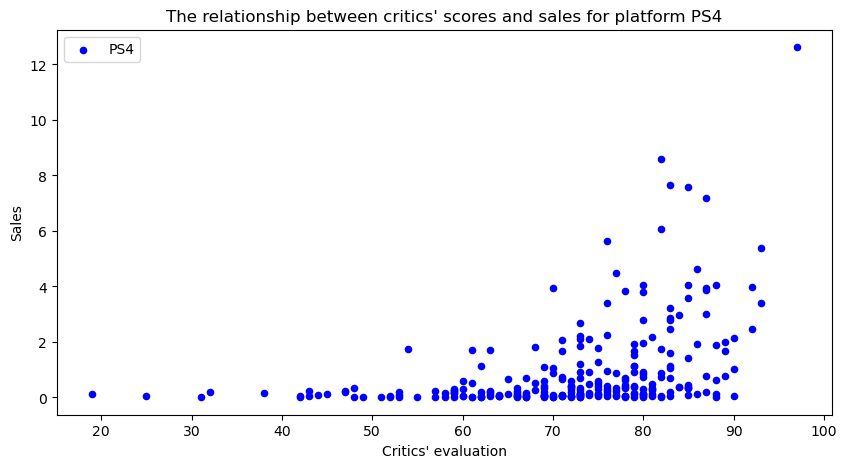

Correlation between critics' scores and sales for platform PS3 =  0.3341517575509856


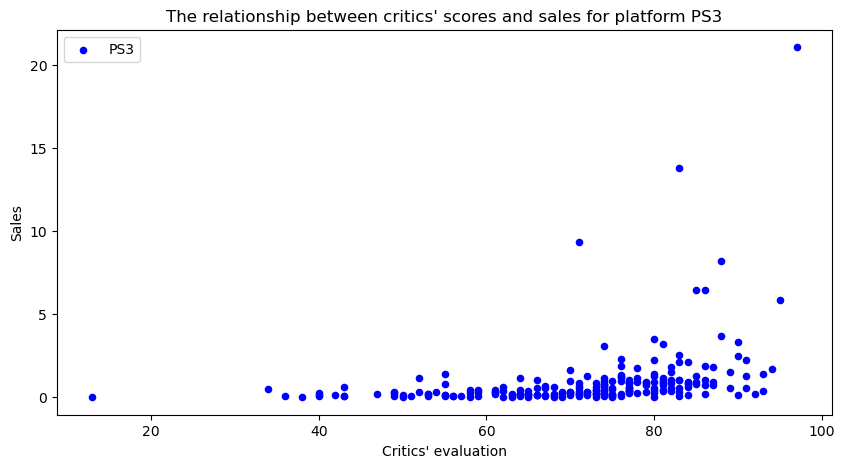

Correlation between critics' scores and sales for platform X360 =  0.3605734888507336


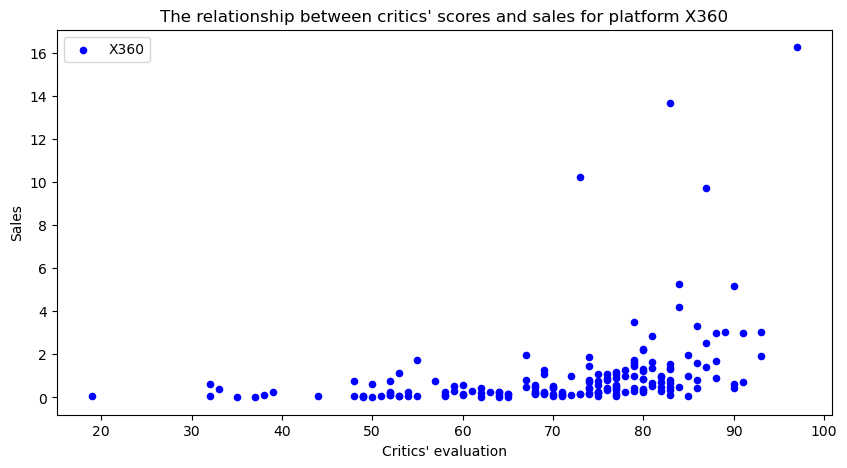

Correlation between critics' scores and sales for platform 3DS =  0.3208028695360785


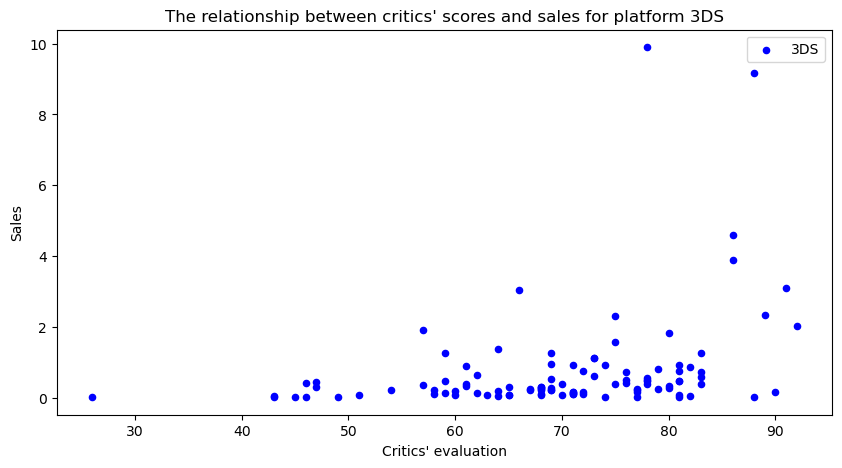

Correlation between critics' scores and sales for platform XOne =  0.4169983280084017


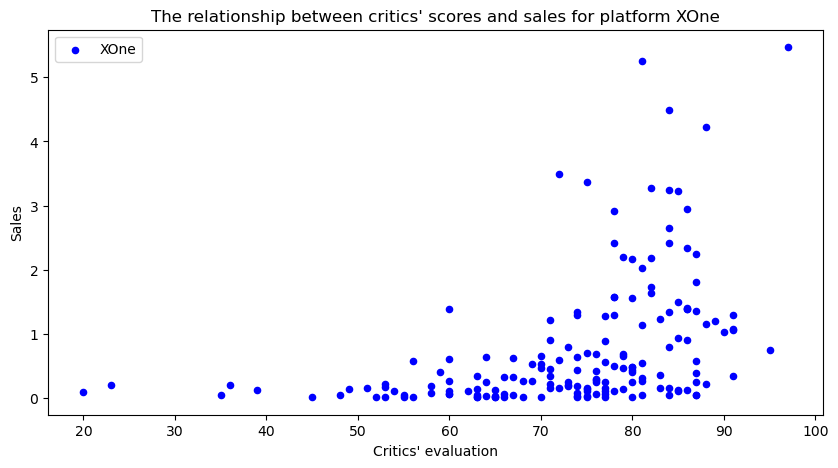

Correlation between critics' scores and sales for platform WiiU =  0.34837976012017485


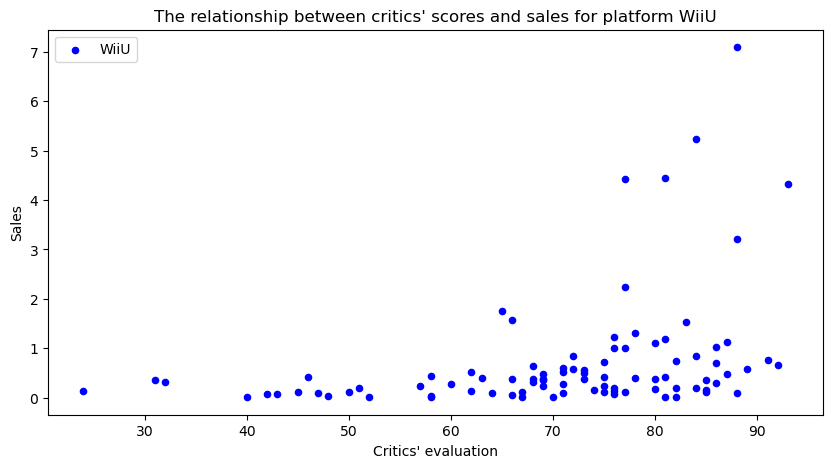

In [65]:
# Plot the correlation between critics' scores and sales for the top 6 platforms
for platform in top_6_platforms:
    (
    recent_data
        .query('platform == @platform and critic_score > -1')
        .plot(x='critic_score', 
              y='total_sales', 
              kind='scatter', 
              figsize=(10, 5), 
              color='blue')
    )
    plt.title(f"The relationship between critics' scores and sales for platform {platform}")  # Changed to double quotes
    plt.xlabel("Critics' evaluation")  # Changed to double quotes
    plt.ylabel('Sales')
    plt.legend([platform])
    
    # Calculating the correlation between critics' scores and sales
    correlation = recent_data.query('platform == @platform and critic_score > -1')['critic_score'].corr(
        recent_data.query('platform == @platform and critic_score > -1')['total_sales']
    )
    
    print(f"Correlation between critics' scores and sales for platform {platform} = ", correlation)  # Changed to double quotes
    plt.show()

The distribution charts show a moderate correlation between critics' scores and sales for each platform.

In [66]:
print('The relationship between user ratings and total sales =', recent_data.query('user_score > -1')['user_score'].corr(recent_data['total_sales']))

The relationship between user ratings and total sales = 0.0041944811069172284


In [69]:
print('Relationship between critics scores and total sales volume = ', recent_data.query('critic_score > -1')['critic_score'].corr(recent_data['total_sales']))


Relationship between critics scores and total sales volume =  0.30863336128976043


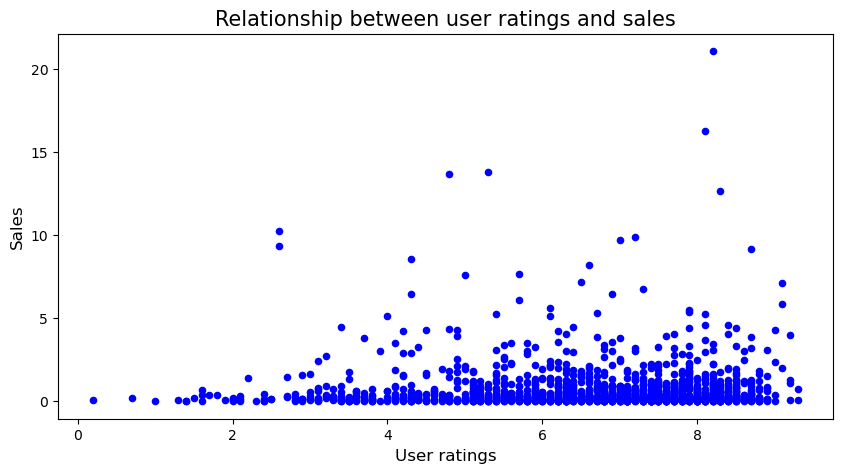

In [70]:
(
 recent_data.query('user_score > -1')
    .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5), 
          color='blue')
)
plt. title('Relationship between user ratings and sales',fontsize=15)
plt.xlabel('User ratings',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.show()

**Conclusion**:

- The correlation coefficient between user ratings and total sales is 0.004, indicating that there is almost no relationship between these indicators.
- The graph shows that even when user ratings increase, sales remain low, with no noticeable correlation. Some games with high scores have very low sales, and conversely, games with low scores sometimes sell in large numbers.
- Perhaps other factors such as marketing, popularity of the franchise, or exclusivity of the game have a greater impact on the success of the game.
---


- The correlation coefficient between critic scores and sales is 0.308, indicating a moderate positive relationship between these indicators.
- This means that games with high critic scores are more likely to have good sales, but the correlation is not very strong. But even here there can be exceptions - games with low scores can sell well due to other factors.

**Let's look at the overall distribution of games by genre:**

Let's plot the total game sales by genre for the current period. Determine which genres are the most profitable and calculate the total sales for each genre.

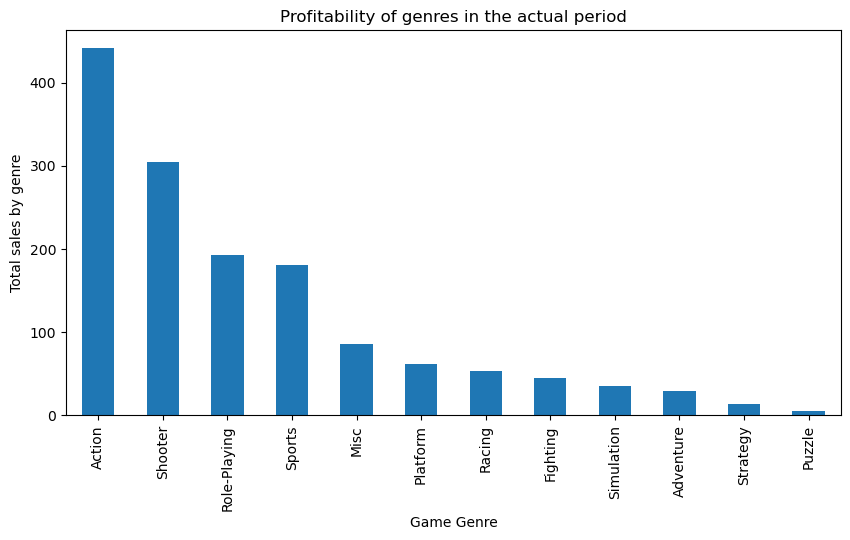

In [71]:
(recent_data
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values('total_sales', ascending=False)
 .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False, title='Profitability of genres in the actual period')
 .set(xlabel='Game Genre', ylabel='Total sales by genre'))

plt.show()

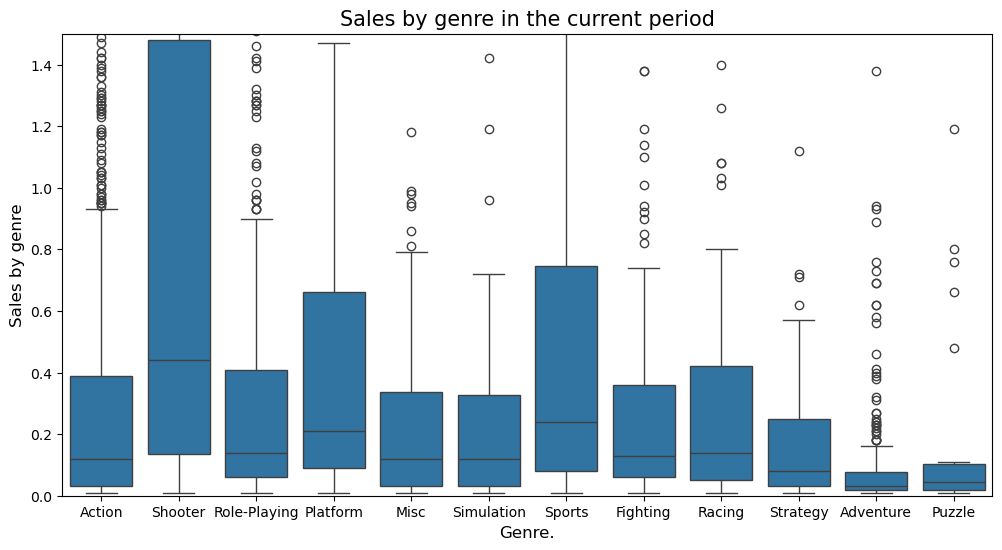

In [72]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=recent_data, x='genre', y='total_sales')
ax.set(ylim=(0, 1.5))
plt.title('Sales by genre in the current period', fontsize=15)
plt.xlabel('Genre.', fontsize=12)
plt.ylabel('Sales by genre', fontsize=12)
plt.show()

In [43]:
(
 recent_data
 .pivot_table(index='genre', values='total_sales', aggfunc='median')
 .sort_values('total_sales', ascending=False)
)


,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


- The Shooter genre is the leader in terms of total sales with 0.440 million units sold. This is confirmed in the first chart, where the genre stands out with the highest sales.
- In second place is the Sports genre, with sales of 0.240 million units, and Platform with 0.210 million units.
- Role-Playing, Racing, and Fighting occupy the next positions, showing moderate results with sales in the range of 0.130-0.140 million units.

**Conclusion from exploratory data analysis:**

- The most promising platforms for 2016 are **PS4**, **XOne**, and **PC**.
- Meanwhile, the **WiiU** and **3DS** platforms show a decline, indicating a decrease in their popularity and less promising sales in the future.
- User ratings do not have a significant impact on sales. This means that user ratings are not a key factor for the game's success in the market.
- Critic scores showed a moderate positive relationship with sales. This suggests that games that receive high critic scores tend to have better sales

# 4. Let's make a portrait of the user of each region

**Let's identify the top 5 most popular platforms by region:**

In [73]:
# Summarize sales by platform in North America
na_sales = (
    recent_data
    .pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .reset_index()
)

# Summarize the other platforms into the "Other" category
na_sales.loc[5:, 'platform'] = 'Other'
na_sales.loc[5, 'na_sales'] = na_sales.loc[5:, 'na_sales'].sum().round(2)
na_sales = na_sales.iloc[0:6, :]

# Summarize sales by platform in Europe
eu_sales = (
    recent_data
    .pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .reset_index()
)

# Summarize the other platforms into the "Other" category
eu_sales.loc[5:, 'platform'] = 'Other'
eu_sales.loc[5, 'eu_sales'] = eu_sales.loc[5:, 'eu_sales'].sum().round(2)
eu_sales = eu_sales.iloc[0:6, :]

# Summarize sales by platform in Japan
jp_sales = (
    recent_data
    .pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .reset_index()
)

# Summarize the other platforms into the "Other" category
jp_sales.loc[5:, 'platform'] = 'Other'
jp_sales.loc[5, 'jp_sales'] = jp_sales.loc[5:, 'jp_sales'].sum().round(2)
jp_sales = jp_sales.iloc[0:6, :]

# Combine regional sales data
regional_sales = pd.merge(na_sales, eu_sales, left_index=True, right_index=True)
regional_sales = pd.merge(regional_sales, jp_sales, left_index=True, right_index=True)

regional_sales.rename(columns={
    'platform_x': 'na_platform',
    'platform_y': 'eu_platform',
    'platform': 'jp_platform'
}, inplace=True)

regional_sales

,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,X360,140.05,PS4,141.09,3DS,87.79
1,PS4,108.74,PS3,106.85,PS3,35.29
2,PS3,103.38,X360,74.52,PSV,21.04
3,XOne,93.12,XOne,51.59,PS4,15.96
4,3DS,55.31,3DS,42.64,WiiU,13.01
5,Other,90.37,Other,90.12,Other,19.49


In [45]:
data = {
    'region': ['Северная Америка', 'Европа', 'Япония'], 
    'platform_column': ['na_platform', 'eu_platform', 'jp_platform'], 
    'sales_column': ['na_sales', 'eu_sales', 'jp_sales']
}

regional_data = pd.DataFrame(data)

regional_data

,region,platform_column,sales_column
0,Северная Америка,na_platform,na_sales
1,Европа,eu_platform,eu_sales
2,Япония,jp_platform,jp_sales


Let's draw pie charts:

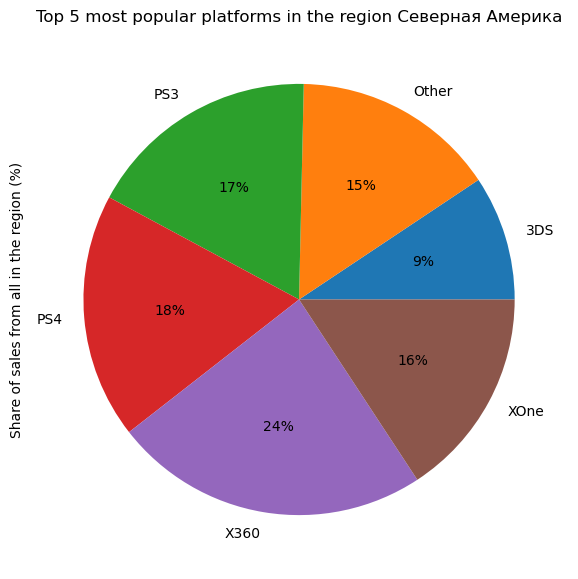

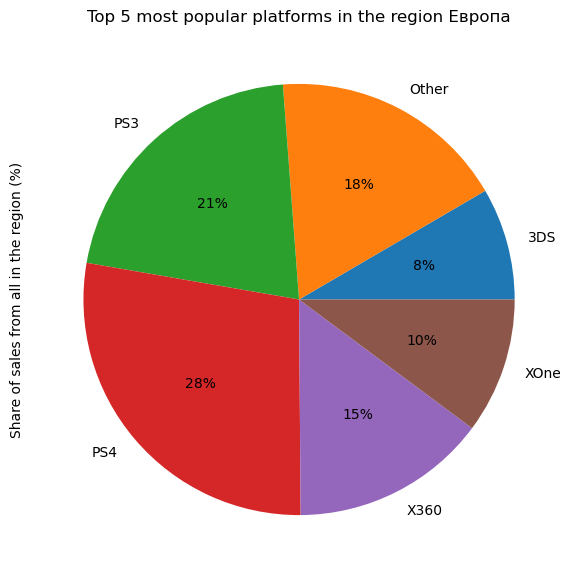

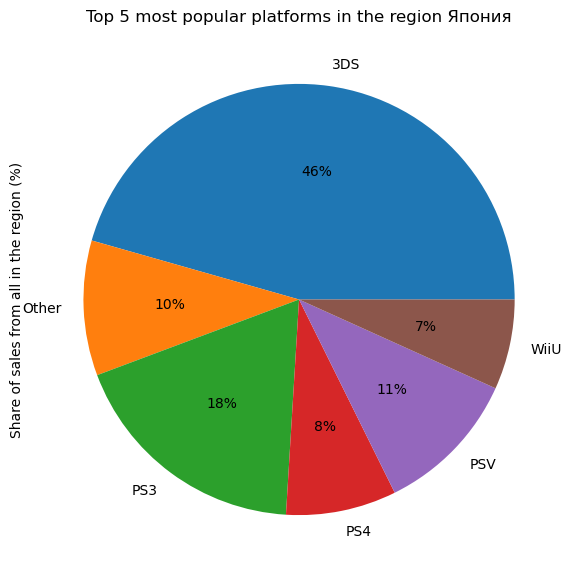

In [74]:
for i in regional_data.index:
    region_name = regional_data['region'][i]
    
    (regional_sales.pivot_table(
        index=regional_data['platform_column'][i], 
        values=regional_data['sales_column'][i], 
        aggfunc='sum')
     .plot(kind='pie', y=regional_data['sales_column'][i], autopct='%1.0f%%', figsize=(7, 7), legend=False)
     .set(ylabel='Share of sales from all in the region (%)')
    )
    
    plt.title(f'Top 5 most popular platforms in the region {region_name}')
    plt.show()

In [75]:
print('Top 5 platforms by region: North America, Europe, Japan and their sales shares')

regional_sales['na_sales'] = round(regional_sales['na_sales'] / regional_sales['na_sales'].sum() * 100, 2)
regional_sales['eu_sales'] = round(regional_sales['eu_sales'] / regional_sales['eu_sales'].sum() * 100, 2)
regional_sales['jp_sales'] = round(regional_sales['jp_sales'] / regional_sales['jp_sales'].sum() * 100, 2)

regional_sales

Top 5 platforms by region: North America, Europe, Japan and their sales shares


,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,X360,23.70,PS4,27.84,3DS,45.59
1,PS4,18.40,PS3,21.08,PS3,18.32
2,PS3,17.49,X360,14.70,PSV,10.93
3,XOne,15.76,XOne,10.18,PS4,8.29
4,3DS,9.36,3DS,8.41,WiiU,6.76
5,Other,15.29,Other,17.78,Other,10.12


**Conclusion:**

1. North America: The market is heavily weighted towards Microsoft consoles, especially the X360, which leads the market. PlayStation consoles such as PS4 and PS3 also have significant shares.
2. Europe: PlayStation consoles dominate. PS4 is the most popular platform, followed by PS3 and X360.
3. Japan: The 3DS is the main console here. The PS3, PSV, and PS4 platforms also have a significant presence.

**Let's find the most popular genres (top 5) by region:**

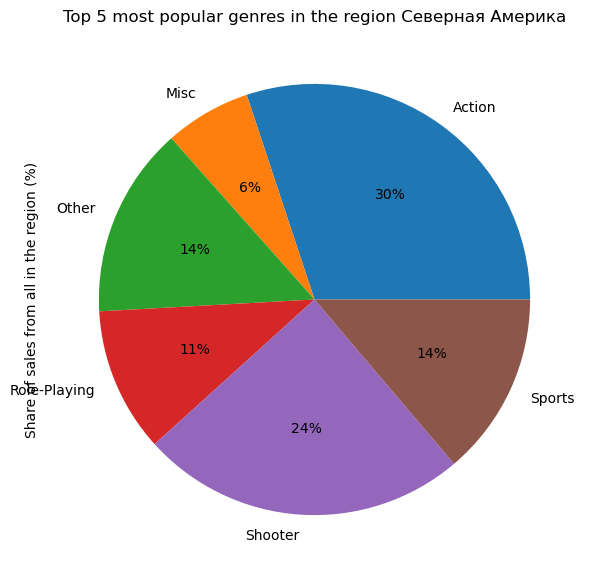

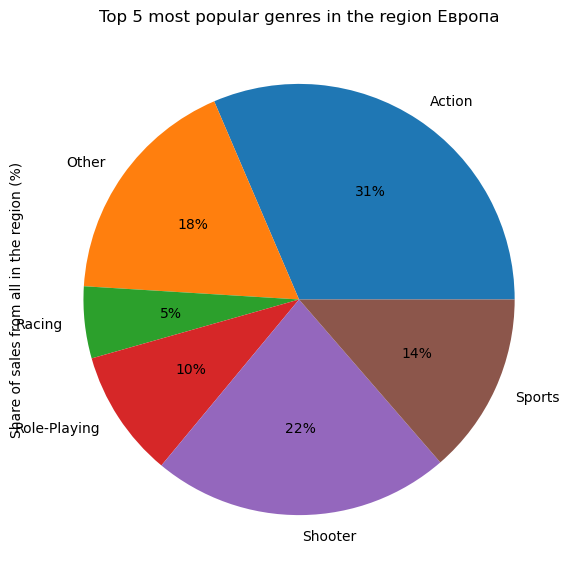

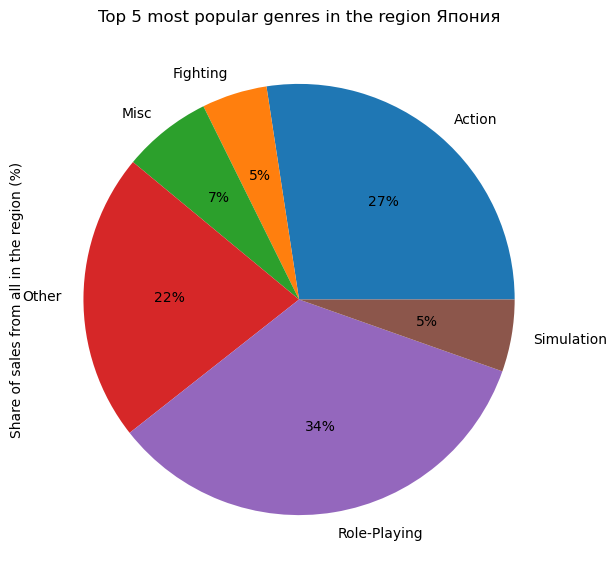

In [76]:
# North America
na_genres = (
    recent_data
    .pivot_table(index=['genre'], values=['na_sales'], aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .reset_index()
)
na_genres.loc[5:, 'genre'] = 'Other'
na_genres.loc[5, 'na_sales'] = na_genres.loc[5:, 'na_sales'].sum().round(2)
na_genres = na_genres.iloc[0:6, :]

# Europe
eu_genres = (
    recent_data
    .pivot_table(index=['genre'], values=['eu_sales'], aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .reset_index()
)
eu_genres.loc[5:, 'genre'] = 'Other'
eu_genres.loc[5, 'eu_sales'] = eu_genres.loc[5:, 'eu_sales'].sum().round(2)
eu_genres = eu_genres.iloc[0:6, :]

# Japan
jp_genres = (
    recent_data
    .pivot_table(index=['genre'], values=['jp_sales'], aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .reset_index()
)
jp_genres.loc[5:, 'genre'] = 'Other'
jp_genres.loc[5, 'jp_sales'] = jp_genres.loc[5:, 'jp_sales'].sum().round(2)
jp_genres = jp_genres.iloc[0:6, :]

genre_sales = pd.merge(na_genres, eu_genres, left_index=True, right_index=True)
genre_sales = pd.merge(genre_sales, jp_genres, left_index=True, right_index=True)

genre_sales.rename(columns={'genre_x': 'na_genre', 'genre_y': 'eu_genre', 'genre': 'jp_genre'}, inplace=True)

data = {'region': ['Северная Америка', 'Европа', 'Япония'], 'genre': ['na_genre', 'eu_genre', 'jp_genre'], 'sales': ['na_sales', 'eu_sales', 'jp_sales']}
regions_genre_sales = pd.DataFrame(data)

for i in regions_genre_sales.index:
    region_name = regions_genre_sales['region'][i]
    
    (genre_sales.pivot_table(index=regions_genre_sales['genre'][i], values=regions_genre_sales['sales'][i], aggfunc='sum')
     .plot(kind='pie', y=regions_genre_sales['sales'][i], autopct='%1.0f%%', figsize=(7, 7), legend=False)
     .set(ylabel='Share of sales from all in the region (%)')
    )
    
    plt.title(f'Top 5 most popular genres in the region {region_name}')
    plt.show()


In [77]:
print('Top 5 genres by region: North America, Europe, Japan and their sales shares')

genre_sales['na_sales'] = round(genre_sales['na_sales'] / genre_sales['na_sales'].sum() * 100, 2)
genre_sales['eu_sales'] = round(genre_sales['eu_sales'] / genre_sales['eu_sales'].sum() * 100, 2)
genre_sales['jp_sales'] = round(genre_sales['jp_sales'] / genre_sales['jp_sales'].sum() * 100, 2)

genre_sales

Top 5 genres by region: North America, Europe, Japan and their sales shares


,na_genre,na_sales,eu_genre,eu_sales,jp_genre,jp_sales
0,Action,30.09,Action,31.44,Role-Playing,33.98
1,Shooter,24.50,Shooter,22.39,Action,27.42
2,Sports,13.80,Sports,13.63,Misc,6.68
3,Role-Playing,10.83,Role-Playing,9.58,Simulation,5.41
4,Misc,6.46,Racing,5.38,Fighting,4.90
5,Other,14.32,Other,17.58,Other,21.62


**Conclusions:**

- Action is the most popular genre in both North America and Europe, accounting for about a third of all sales. In Japan, it is the second most popular genre.
- Shooter is second in North America and Europe, but not in the top 5 in Japan.
- Role-Playing is the leader in Japan. This genre is less popular in North America and Europe, but is still in the top five.
- Sports is consistently ranked third in North America and Europe, but it is not popular in Japan.
- In Japan, Simulation and Fighting are among the top 5 genres, which is not the case in other regions.

**Let's estimate the impact of ESRB rating on sales in the regions:**

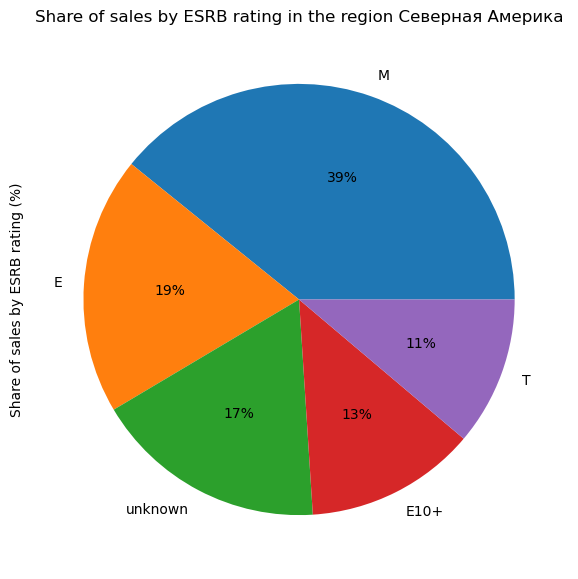

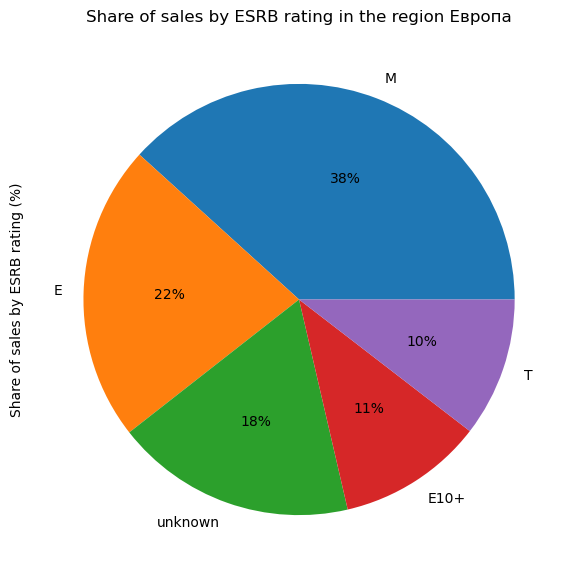

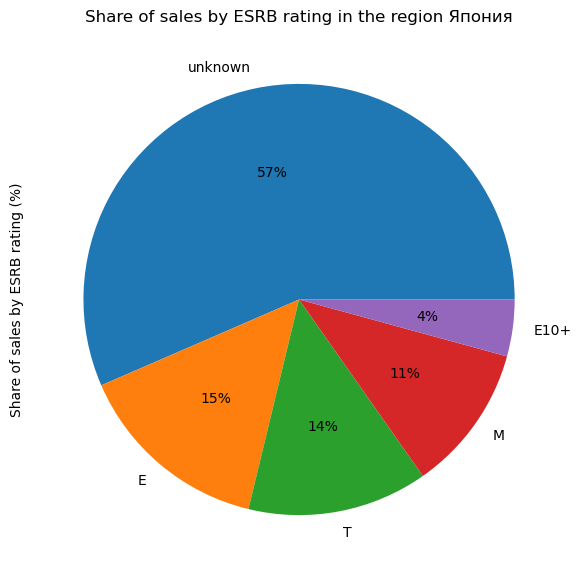

In [78]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

region_names = {
    'na_sales': 'Северная Америка',
    'eu_sales': 'Европа',
    'jp_sales': 'Япония'
}

for region in regions:
    region_name = region_names[region]
    
    
    (recent_data.pivot_table(index='rating', values=region, aggfunc='sum')
     .sort_values(region, ascending=False)
     .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(7, 7), legend=False)
     .set(ylabel='Share of sales by ESRB rating (%)')
    )
    
    plt.title(f'Share of sales by ESRB rating in the region {region_name}')
    plt.show()

**Conclusion:**

- E-rated games (Everyone) dominate in all regions, especially in Japan, where they account for more than half of sales (57%).
- Mature games for adults have a significant share in North America (19%) and Europe (22%). In Japan, the share of such games is significantly lower (15%).
- Games rated "T" (Teen) hold stable positions in all regions with a share of 14% to 18%.
- Games rated "E10+" are less popular, with a share of 11% to 13% in different regions.

**User portrait by region:**

- North America and Europe have a similar user profile - family gamers and adults who prefer action, shooters and games for a general audience.
- Japan is characterized by the popularity of RPGs and games for all ages. Adult games are less popular here compared to Western markets.

# 5. Hypothesis testing

**Average user ratings for Xbox One and PC platforms are the same**

- H0 (null hypothesis): The average user ratings of XOne and PC platforms are the same.
- H1 (alternative hypothesis): The average user ratings of XOne and PC platforms are different.

In [79]:
xone_data = recent_data.query('platform == "XOne" and user_score > -1')
print('Descriptive statistics of user ratings for XOne:\n\n', xone_data['user_score'].describe())

pc_data = recent_data.query('platform == "PC" and user_score > -1')
print('Descriptive statistics of user ratings for PC:\n\n', pc_data['user_score'].describe())

Descriptive statistics of user ratings for XOne:

 count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
Descriptive statistics of user ratings for PC:

 count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64


In [80]:
# Significance level
alpha = 0.05

# Performing a t-test to compare average user ratings for XOne and PC
results = st.ttest_ind(
    xone_data['user_score'], 
    pc_data['user_score'],
    equal_var=False,  
    alternative='two-sided'  
)


print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis: the average user ratings of XOne and PC are different.')
else:
    print('There was no way to reject the null hypothesis: the average user ratings of XOne and PC are equal.')


p-value: 0.5489537965134912
There was no way to reject the null hypothesis: the average user ratings of XOne and PC are equal.


Conclusion: It was not possible to reject the null hypothesis, suggesting that the average user ratings of the XOne and PC platforms are not different.

**Average user ratings for the Action and Sports genres are different.**

- H0 (null hypothesis): The average user ratings of Action and Sports genres are the same.
- H1 (alternative hypothesis): Average user ratings of Action and Sports genres differ.

In [82]:
action_genre = recent_data.query('genre == "Action" and user_score > -1')
print('Descriptive statistics of user ratings for the genre Action\n\n', action_genre['user_score'].describe())

sports_genre = recent_data.query('genre == "Sports" and user_score > -1')
print('Descriptive statistics of user ratings for the genre Sports\n\n', sports_genre['user_score'].describe())

Descriptive statistics of user ratings for the genre Action

 count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64
Descriptive statistics of user ratings for the genre Sports

 count    194.000000
mean       5.455670
std        1.743142
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64


In [83]:
# Significance level
alpha = 0.05

#Performing a t-test to compare average user ratings of Action and Sports genres
results = st.ttest_ind(
    action_genre['user_score'], 
    sports_genre['user_score'],
    equal_var=False,  
    alternative='two-sided'  
)


print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print('We reject the null hypothesis: the average user ratings of the Action and Sports genres are different.')
else:
    print('We failed to reject the null hypothesis: the average user ratings of the Action and Sports genres are equal.')

p-value: 5.989458066467418e-20
We reject the null hypothesis: the average user ratings of the Action and Sports genres are different.


CONCLUSION: The null hypothesis was rejected, suggesting that the mean ratings of Action and Sports genres are different.

**How did you formulate the null and alternative hypotheses?


Null hypothesis (H0): The average user ratings of XOne and PC platforms are equal. Alternative hypothesis (H1): The mean ratings are different. Since the question is related to equality, a two-sided test (alternative='two-sided') was used.


Hypotheses were also formulated for Action and Sports genres: H0 - average user ratings are equal, H1 - they differ. In both cases, the test was carried out by a two-sided test.


**Which criterion was used to test the hypotheses and why?


Student's t-test for independent samples was used because the samples have normal distribution and are large enough (>30 observations). The parameter equal_var=False was used because the variance of the samples may be different.

# 6. Conclusion

In the course of work with data on game sales in different regions the following work was carried out:
1. general information about the dataset was studied, weaknesses were identified: omissions, style violations, incorrect data types. However, the amount of data was sufficient for further analysis.




2. data preprocessing was carried out, namely:
- Checking for explicit duplicates (not found);
- Searching for and deleting implicit duplicates;
- Deletion of rows with skips;
- Renamed and replaced missing values in a number of columns for correctness of further data analysis;
- Corrected data types in a number of columns;
- Total sales in all regions were calculated and tabulated.
3. an exploratory analysis of the data was carried out:
- Selected a suitable time period (last 7 years) for the purpose of the study;
- Findings:
- The PS4 remains the most promising platform in 2016, with strong sales despite a slight decline. It is followed by XOne, although its peak has already passed.
- The previous generation platforms (PS3, X360, Wii, DS) have almost completely lost relevance.
- The 3DS and WiiU are also on the decline and their prospects in 2016 are slim.
- It has also been shown that:
- **User ratings** have virtually no effect on game sales, as evidenced by the very low correlation coefficient. This may indicate that consumers do not always rely on user ratings when choosing games.
- **Critics' scores**, on the other hand, have a greater impact on sales, although they are not a major factor in a game's success. A moderate correlation of 0.308 shows that games with higher critic scores are more likely to sell better, but not always.
- The Shooter genre is the most profitable in the current period with the highest total sales, followed by Sports and Platform.
- Genres such as Adventure and Puzzle were the least profitable.
- It turns out that each region has its own preferences. North America is dominated by Microsoft consoles, Europe is dominated by PlayStation, and Japan is dominated by handhelds such as 3DS.
- Showed that the Action and Shooter genres dominate in North America and Europe, while Japan has its*specific preferences*, with an emphasis on Role-Playing games.
4. For each region, a user profile was compiled:
- North America and Europe have a similar user portrait - they are family players and adults who prefer action, shooter and general audience games.
- Japan is characterized by the popularity of RPGs and games for all ages. Adult games are less popular here compared to Western markets.




5. Hypotheses tested:
- On the equality of average user ratings of Xbox One and PC platforms - The null hypothesis of equality of average ratings was not rejected, indicating that there is no statistically significant difference between the ratings of these platforms.
- A comparison of the average user ratings of the Action and Sports genres showed that there is a statistically significant difference between these genres. The null hypothesis was rejected, which means that users rate games of these genres differently.


6. Summarized the work done and drew conclusions.




**The following recommendations can be made based on the results of the work done:**
- Bet on PS4 and XOne: It is important to consider the popularity of PS4 as the most promising platform in recent years. The XOne is also worth considering, although it has passed its peak.
- Choose the right genres: To increase sales, you should focus on Shooter, Sports, and Platform genres, as they have proven to be the most profitable.
- Consider regional variations: In North America and Europe, focus on action and shooters, while in Japan, focus on RPGs and handheld platforms.